## Visualising Food by Super Group using a network Graph

Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re #regular expressions 
from fuzzywuzzy import fuzz
import networkx as nx
import glob
import os

Import Dataset

In [73]:
pd.set_option('display.max_rows', None)
Retail = pd.read_csv(r'C:\Users\medekar\Desktop\Product_Weight_Project\Confidential\Exported Data\RetdJoin.csv', index_col=0)
Retail

Food Code                                          Food Name Group  \
0        17-208                        Beer, bitter, best, premium    QA   
1        17-224                                       Cider, sweet    QC   
2        17-234                                               Port    QF   
3        17-236                                     Sherry, medium    QF   
4        17-247                                Spirits, 40% volume    QK   
5        17-239                                      Vermouth, dry    QG   
6        17-752                                          Wine, red    QE   
7        17-756                                Wine, white, medium    QE   
8        14-272   Apple juice concentrate, unsweetened, commerical    PE   
9        17-632                          Coffee, cappuccino, latte     P   
10       17-175                                               Cola   PCA   
11       17-744                        Cranberry fruit juice drink    PE   
12       17-498                         Drinking chocolate, powder   PAA   
13       17-672                           Energy drink, carbonated   PCA   
14       17-745                           Grape juice, unsweetened    PE   
15       17-731                                   Horlicks, powder   PAA   
16       17-179                                           Lemonade   PCA   
17       17-761                                           Lucozade   PCA   
18       17-751                                     Lager, premium    QA   
19       17-244                            Liqueurs, high strength    QI   
20       17-733                                 Milk shake, powder   PAA   
21       17-734                                   Ovaltine, powder   PAA   
22       11-001                                          Arrowroot    AA   
23       11-002                                 Barley, pearl, raw    AA   
24       11-906                                        Bran, wheat    AA   
25       11-006                                  Buckwheat, groats    AA   
26      11-1144                         Bread rolls, brown, crusty    AF   
27      11-1006                           Bread rolls, white, soft    AF   
28       11-971                              Bread, brown, average    AF   
29       11-969                                    Bread, ciabatta    AF   
30       11-937                     Bread, garlic and herb, retail    AF   
31       11-910    Bread, naan, peshwari naan, takeaway and retail    AF   
32       11-973                                Bread, naan, retail    AF   
33       11-974                                Bread, pitta, white    AF   
34       11-947                                      Bread, seeded    AF   
35      11-1145                              Bread, white, average    AF   
36       11-977               Bread, white, farmhouse or split tin    AF   
37       11-978                         Bread, white, french stick    AF   
38       11-980                               Bread, white, sliced    AF   
39       11-981                          Bread, wholemeal, average    AF   
40       11-983                           Bread rolls, brown, soft    AG   
41       11-984                          Bread rolls, malted wheat    AG   
42       11-985                         Bread rolls, white, crusty    AG   
43       11-763           Breakfast cereal, bran flakes, fortified    AI   
44       11-779  Breakfast cereal, fruit and fibre type, fortified    AI   
45       11-755  Breakfast cereal, honey loops and hoops, inclu...    AI   
46       11-792  Breakfast cereal, instant hot oat, plain, raw,...    AI   
47       11-753  Breakfast cereal, rice, chocolate flavoured, f...    AI   
48       11-778  Breakfast cereal, shredded wheat, honey nut, n...    AI   
49       11-773  Breakfast cereal, wheat biscuits, weetabix typ...    AI   
50       11-821                         Biscuits, cheese flavoured    AM   
51       11-815        Biscuits, cookies, chocolate ch

                                            Creating and Visualising Graph

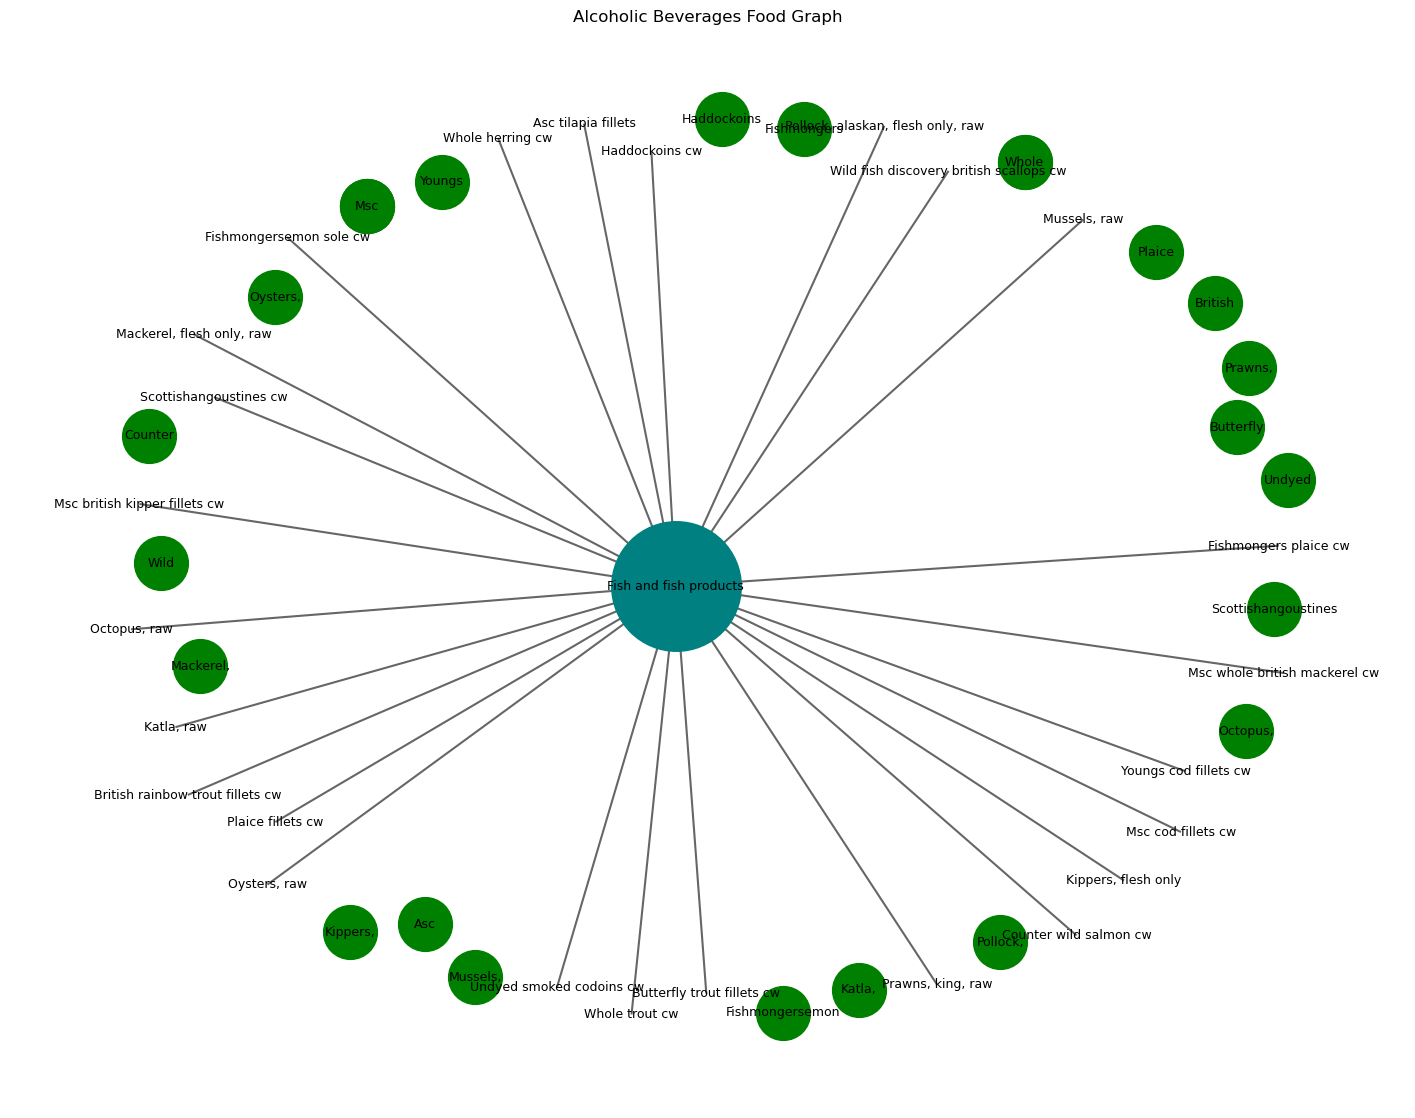

CPU times: total: 297 ms
Wall time: 324 ms


In [75]:
%%time
# Filter the dataframe to include only rows with 'Alcoholic beverages' as the super group
filtered_retail = Retail[Retail['Super Group'] == 'Fish and fish products'][25:50]

# Create graph
food_graph = nx.Graph()

# Add nodes - unique categories and foods
categories = set(filtered_retail['Super Group'])
foods = filtered_retail['Food Name'].apply(lambda x: x.split()[0])  # Extract the first word from each food name
food_graph.add_nodes_from(categories, bipartite=0)
food_graph.add_nodes_from(foods, bipartite=1)

# Add weighted edges between foods and categories
for _, row in filtered_retail.iterrows():
    food_graph.add_edge(row['Super Group'], row['Food Name'])

# Generate positions using spring layout
pos = nx.spring_layout(food_graph, iterations=100, k=2.5)

# Draw graph
plt.figure(figsize=(18, 14))
nx.draw_networkx_nodes(food_graph, pos, nodelist=categories, node_size=8700, node_color='teal')
nx.draw_networkx_nodes(food_graph, pos, nodelist=foods, node_size=1500, node_color='green')
nx.draw_networkx_edges(food_graph, pos, width=1.5, alpha=0.6, edge_color='black')
nx.draw_networkx_labels(food_graph, pos, font_size=9, font_family='sans-serif')
plt.axis('off')
plt.grid()

# Add title
plt.title('Alcoholic Beverages Food Graph')

# Save plot to file
# plt.savefig('food_graph.png')
plt.show()

                                            Creating an interactive Version

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
import networkx as nx

# Assuming you already have the 'Retail' DataFrame and other necessary data and libraries loaded.

# Filter the dataframe to include only rows with 'Alcoholic beverages' as the super group
filtered_retail = Retail[Retail['Super Group'] == 'Fish and fish products'][25:50]

# Create graph
food_graph = nx.Graph()

# Add nodes - unique categories and foods
categories = set(filtered_retail['Super Group'])
foods = filtered_retail['Food Name'].apply(lambda x: x.split()[0])  # Extract the first word from each food name
food_graph.add_nodes_from(categories, bipartite=0)
food_graph.add_nodes_from(foods, bipartite=1)

# Add weighted edges between foods and categories
for _, row in filtered_retail.iterrows():
    food_graph.add_edge(row['Super Group'], row['Food Name'])

# Generate positions using spring layout
pos = nx.spring_layout(food_graph, iterations=100, k=2.5)

# Create Plotly Dash app
app = dash.Dash(__name__)

# Layout of the web application
app.layout = html.Div([
    dcc.Graph(
        id='food-graph',
        figure={
            'data': [
                go.Scatter(
                    x=[pos[node][0]],
                    y=[pos[node][1]],
                    text=node,
                    mode='markers',
                    marker={
                        'size': 18 if node in categories else 8,
                        'color': 'teal' if node in categories else 'green'
                    },
                    hoverinfo='text'
                )
                for node in food_graph.nodes()
            ],
            'layout': go.Layout(
                title='Alcoholic Beverages Food Graph',
                showlegend=False,
                hovermode='closest',
                margin={'b': 0, 'l': 0, 'r': 0, 't': 30},
                annotations=[
                    {
                        'x': pos[node][0],
                        'y': pos[node][1],
                        'xref': 'x',
                        'yref': 'y',
                        'text': node,
                        'showarrow': True,
                        'arrowhead': 2,
                        'ax': 0,
                        'ay': -40 if node in categories else 40
                    }
                    for node in food_graph.nodes()
                ]
            )
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)
